# Creating TF-IDF

In [21]:
import pickle

# Load pickle file
with open('df_law_clean.pickle', 'rb') as f:
    df = pickle.load(f)

In [4]:
df.head()

afstemnings_id        dato_sagstrin  sag_id  \
0               2  2014-09-09T09:15:00    1449   
1               4  2012-11-06T00:00:00    5904   
2               5  2014-09-09T09:15:00    1449   
3               9  2014-06-11T09:00:00    1451   
4              10  2014-06-11T09:00:00     780   

                                               titel  \
0  Forslag til lov om ændring af virksomhedsskatt...   
1  Forslag til lov om akutjob og jobpræmie til ar...   
2  Forslag til lov om ændring af virksomhedsskatt...   
3  Forslag til lov om ændring af lov om trafiksel...   
4  Forslag til lov om projektering af nyanlæg og ...   

                                          titel_kort lovnummer_num  \
0  Om indgreb mod utilsigtet udnyttelse af virkso...           200   
1                                        Om akutjob.            46   
2  Om indgreb mod utilsigtet udnyttelse af virkso...           200   
3  Om Region Nordjyllands overtagelse af statens ...           136   
4  Om nyanlæg og hastighedsopgraderinger af jernb...           172   

                                              resume  periode_id  \
0  Loven ændrer virksomhedsskatteordningens regle...          32   
1  Med loven etableres en midlertidig ordning, så...          31   
2  Loven ændrer virksomhedsskatteordningens regle...          32   
3  Med loven åbnes der mulighed for, at Region No...          32   
4  Loven indeholder bemyndigelse til, at transpor...          32   

                                 votes_combined_info  \
0  [{'id': 180, 'typeid': 1, 'afstemningid': 2, '...   
1  [{'id': 850407, 'typeid': 1, 'afstemningid': 4...   
2  [{'id': 164665, 'typeid': 1, 'afstemningid': 5...   
3  [{'id': 163591, 'typeid': 4, 'afstemningid': 9...   
4  [{'id': 163770, 'typeid': 1, 'afstemningid': 1...   

                                      votes_adjusted afstemnings_id_pfix  \
0  [{'id': 180, 'typeid': 1, 'afstemningid': 2, '...                  p2   
1  [{'id': 850407, 'typeid': 1, 'afstemningid': 4...                  p4   
2  [{'id': 164665, 'typeid': 1, 'afstemningid': 5...                  p5   
3  [{'id': 163591, 'typeid': 4, 'afstemningid': 9...                  p9   
4  [{'id': 163770, 'typeid': 1, 'afstemningid': 1...                 p10   

                                        law_category  \
0          [Skatter og afgifter 70, virksomhedsskat]   
1  [akutjob og jobpræmie til arbejdsgivere, polit...   
2          [Skatter og afgifter 70, virksomhedsskat]   
3            [kollektiv transport, transportpolitik]   
4  [politisk aftale, projektering af nyanlæg og h...   

                       law_category_id  \
0                       [33062, 33754]   
1         [62218, 34460, 33270, 33070]   
2                       [33062, 33754]   
3                       [33056, 33086]   
4  [34460, 84356, 83647, 33917, 33364]   

                                  law_category_clean  
0             [Skatter og afgifter, virksomhedsskat]  
1  [akutjob og jobpræmie til arbejdsgivere, polit...  
2             [Skatter og afgifter, virksomhedsskat]  
3            [kollektiv transport, transportpolitik]  
4  [politisk aftale, projektering af nyanlæg og h...

In [9]:
# Extract law texts that a certain party has voted for


## TF-IDF

In [6]:
import numpy as np
import regex as re
import pandas as pd
import pickle
from collections import defaultdict

In [22]:
#First create a dict for each law that contains the majority vote for each party

#Function that returns the majority typeid for each party for a given law
def get_majority_typeid_for_party(law):
    #Create a dict with the party as key and the typeid as value
    party_typeid_dict = {}
    for vote in law:
        #If the party is not already in the dict, add it
        if vote['party'] not in party_typeid_dict:
            party_typeid_dict[vote['party']] = [vote['typeid']]
        #If the party is already in the dict, append the typeid to the list of typeids
        else:
            party_typeid_dict[vote['party']].append(vote['typeid'])
    #Create a dict with the party as key and the majority typeid as value
    party_majority_typeid_dict = {}
    for party in party_typeid_dict:
        #Get the most common typeid for each party
        party_majority_typeid_dict[party] = max(set(party_typeid_dict[party]), key=party_typeid_dict[party].count)
    return party_majority_typeid_dict

#create a new column in the votes_df_combined dataframe called majority_typeid_for_party
df['majority_party_vote'] = [get_majority_typeid_for_party(law) for law in df['votes_adjusted']]

In [23]:
#Function that creates a dict with all the text in 'resume' summed for each unique key in the majority_party_vote column if the key has the value 1 in the majority_party_vote (yes)
def get_text_for_party_yes(law_text_list, majority_party_vote_list):
    #Create a dict with the party as key and the text as value
    party_text_dict = {}
    for law_text, party_vote_dict in zip(law_text_list, majority_party_vote_list):
        for party in party_vote_dict:
        #If the party is not already in the dict, add it
            if party_vote_dict[party] == 1:
                if party not in party_text_dict:
                    party_text_dict[party] = law_text
                else:
                    party_text_dict[party] += law_text
    return party_text_dict

text_dict = get_text_for_party_yes(list(df['resume']), list(df['majority_party_vote']))


In [24]:
text_dict.keys()

dict_keys(['Socialistisk Folkeparti', 'Venstre, Danmarks Liberale Parti', 'Dansk Folkeparti', 'Socialdemokratiet', 'Enhedslisten', 'Radikale Venstre', 'Det Konservative Folkeparti', 'Liberal Alliance', 'Uden for folketingsgrupperne', 'Sambandsflokkurin', 'Kristendemokraterne', 'Siumut', 'Alternativet', 'Inuit Ataqatigiit', 'Tjóðveldi', 'Tjóðveldisflokkurin', 'Ny Alliance', 'Fólkaflokkurin', 'Nye Borgerlige'])

In [25]:
len(text_dict['Socialistisk Folkeparti'])

2348092

In [26]:
len(text_dict['Kristendemokraterne'])

63435

In [27]:
import nltk
from nltk.tokenize import word_tokenize

In [34]:
# Tokenize the party texts
token_dict = {}
for party in text_dict.keys():
    token_dict[party] = word_tokenize(text_dict[party])

In [35]:
stopwords = nltk.corpus.stopwords.words('danish')

In [36]:
freqDist = {}

# Calculate the frequency distribution of the words in each party
#only process words, and consider all words as lower-case
for party in token_dict.keys():
    freqDist[party] = nltk.FreqDist(word.lower() for word in token_dict[party] if word.isalpha() and word.lower() not in stopwords)

In [37]:
# Get the top 5 words in each party
for party in sorted(freqDist.keys()):
    print(f'{party} top 5 words: {freqDist[party].most_common(5)}')

Alternativet top 5 words: [('lovforslaget', 1568), ('foreslås', 799), ('kan', 593), ('kraft', 524), ('folkeparti', 511)]
Dansk Folkeparti top 5 words: [('loven', 3239), ('lovforslaget', 3008), ('kan', 1859), ('folkeparti', 1517), ('ved', 1492)]
Det Konservative Folkeparti top 5 words: [('loven', 3367), ('lovforslaget', 3028), ('kan', 1911), ('ved', 1524), ('folkeparti', 1484)]
Enhedslisten top 5 words: [('loven', 1997), ('lovforslaget', 1903), ('kan', 1220), ('ved', 975), ('foreslås', 938)]
Fólkaflokkurin top 5 words: [('danske', 8), ('færøernes', 7), ('landsstyre', 7), ('kan', 7), ('færøske', 7)]
Inuit Ataqatigiit top 5 words: [('lovforslaget', 42), ('grønland', 30), ('kan', 19), ('grønlands', 18), ('loven', 18)]
Kristendemokraterne top 5 words: [('lovforslaget', 95), ('baggrund', 71), ('kan', 49), ('loven', 46), ('ved', 39)]
Liberal Alliance top 5 words: [('lovforslaget', 2310), ('loven', 1447), ('kan', 1156), ('foreslås', 1089), ('folkeparti', 948)]
Ny Alliance top 5 words: [('loven

In [38]:
idf = {}

for comm in freqDist.keys():
    #for each community (number)
    for word in freqDist[comm].keys():
        #if the word has not been IDF scored yet
        if word not in idf.keys():
            for freq_dict in freqDist.values():
                if word in freq_dict.keys():
                    #if the word is in the frequency dict of a given community, 1 to the IDF score
                    if word not in idf.keys():
                        idf[word] = 1
                    else:
                        idf[word] += 1
            #Divide the total number of communities ("documents ") with the number of communities in which the word appeared
            idf[word] = len(freqDist.keys())/ idf[word]
            idf[word] = np.log2(idf[word])

In [39]:
for party in freqDist.keys():
    for word in freqDist[party].keys():
        freqDist[party][word] = freqDist[party][word]/len(token_dict[party])


In [40]:


tf_idf = {}

for comm in freqDist.keys():
    tf_idf[comm] = {}
    # For each word in the community, multiply the TF and IDF score
    for word in freqDist[comm].keys():
        tf_idf[comm][word] = freqDist[comm][word] * idf[word]




In [ ]:
#remove the keys Fólkaflokkurin, 

In [47]:
#number of uniqe keys in the tf_idf dict
len(tf_idf.keys())


19

In [44]:
# List the top 10 words in each party according to TF-IDF
for party in sorted(tf_idf.keys()):
   
    #round the [1] element of the tuple (the TF-IDF score) to 3 decimals
    print(f'{party} top 10 words: {[(word, round(score, 3)) for word, score in sorted(tf_idf[party].items(), key=lambda x: x[1], reverse=True)[:10]]}')


Alternativet top 10 words: [('foreslås', 0.002), ('folkeparti', 0.001), ('venstre', 0.001), ('alliance', 0.001), ('liberal', 0.001), ('dansk', 0.001), ('enhedslisten', 0.0), ('træder', 0.0), ('socialdemokratiet', 0.0), ('regler', 0.0)]
Dansk Folkeparti top 10 words: [('folkeparti', 0.001), ('foreslås', 0.001), ('dansk', 0.001), ('loven', 0.001), ('venstre', 0.001), ('del', 0.001), ('alliance', 0.0), ('regler', 0.0), ('liberal', 0.0), ('konservative', 0.0)]
Det Konservative Folkeparti top 10 words: [('folkeparti', 0.001), ('foreslås', 0.001), ('loven', 0.001), ('venstre', 0.001), ('dansk', 0.001), ('del', 0.001), ('alliance', 0.0), ('regler', 0.0), ('liberal', 0.0), ('reglerne', 0.0)]
Enhedslisten top 10 words: [('foreslås', 0.001), ('folkeparti', 0.001), ('loven', 0.001), ('venstre', 0.001), ('dansk', 0.0), ('enhedslisten', 0.0), ('del', 0.0), ('regler', 0.0), ('alliance', 0.0), ('reglerne', 0.0)]
Fólkaflokkurin top 10 words: [('færøernes', 0.007), ('landsstyre', 0.006), ('færøske', 0.

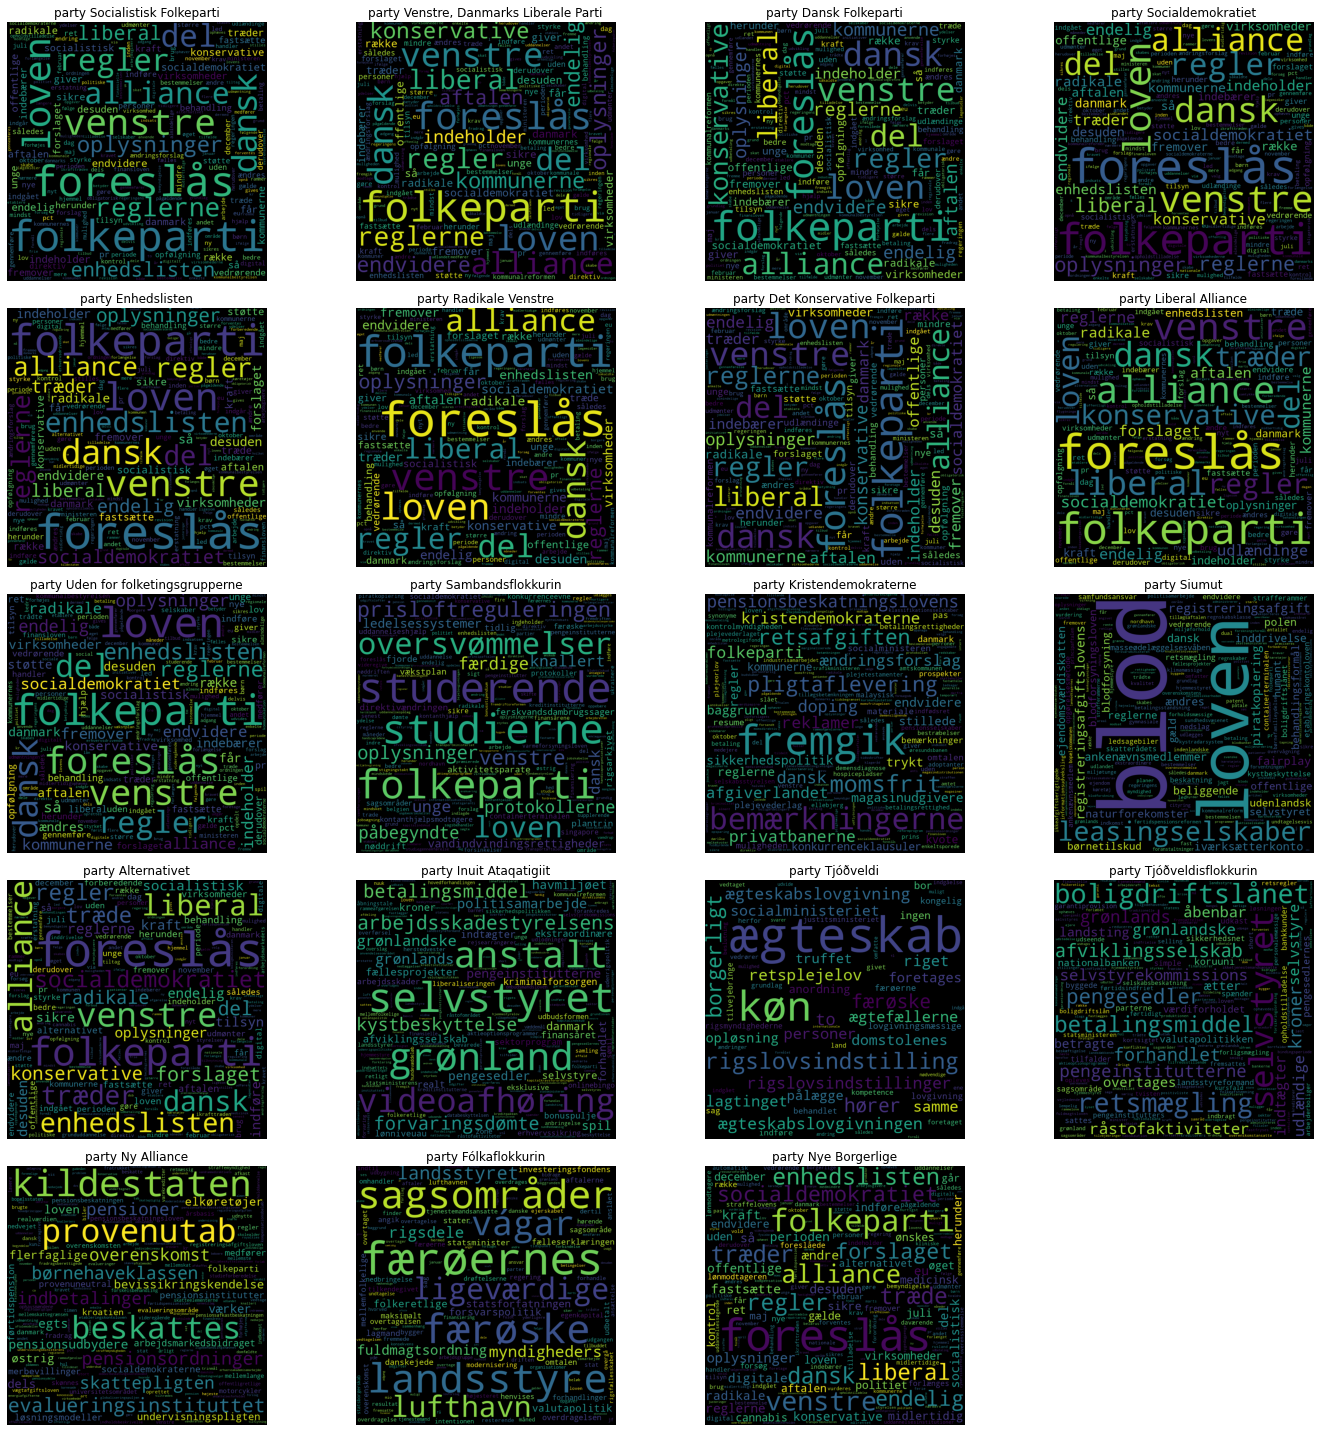

In [60]:
# Create a word cloud for each community

import matplotlib.pyplot as plt
import matplotlib.patches as patches

from matplotlib import colors
from matplotlib.lines import Line2D

from wordcloud import WordCloud, STOPWORDS

fig, axs = plt.subplots(figsize=(20, 20))
plt.subplots_adjust(hspace=0.1, wspace=0.05)
#fig.suptitle("Wordclouds of the parties", fontsize=16)

for n, party in enumerate(tf_idf.keys()):
    wordcloud = WordCloud(
                width = 800, 
                height = 800,
                background_color ='black',
                stopwords = STOPWORDS,
                collocations=False,
                ).generate_from_frequencies(tf_idf[party])
    
    # Create a subplot of the wordcloud
    ax = plt.subplot(5, 4, n+1)
    
    ax.imshow(wordcloud)
    ax.axis("off")
    ax.set_title(f'party {party}')

fig.tight_layout()
plt.show()

In [64]:
#What happens if we sort of all small parties?

#remove the smaler parties freqDist dict, that means Inuit Ataqatigiit, Tjóðveldi, Fólkaflokkurin, Tjóðveldisflokkurin, Uden for folketingsgrupperne, Sambandsflokkurin, Siumut
#Remove the following keys from the freqDist dict: [Inuit Ataqatigiit, Tjóðveldi, Fólkaflokkurin, Tjóðveldisflokkurin, Uden for folketingsgrupperne, Sambandsflokkurin, Siumut]
small_parties =  ['Inuit Ataqatigiit', 'Tjóðveldi', 'Fólkaflokkurin', 'Tjóðveldisflokkurin', 'Uden for folketingsgrupperne', 'Sambandsflokkurin', 'Siumut']
for party in small_parties:
    if party in freqDist.keys():
        del freqDist[party]

In [70]:
#print len of the token_dict for each party
for party in token_dict.keys():
    print(f'{party} len: {len(token_dict[party])}')

Socialistisk Folkeparti len: 361443
Venstre, Danmarks Liberale Parti len: 420837
Dansk Folkeparti len: 396088
Socialdemokratiet len: 414149
Enhedslisten len: 248359
Radikale Venstre len: 348628
Det Konservative Folkeparti len: 403620
Liberal Alliance len: 236421
Uden for folketingsgrupperne len: 105921
Sambandsflokkurin len: 6657
Kristendemokraterne len: 9662
Siumut len: 5983
Alternativet len: 124944
Inuit Ataqatigiit len: 3175
Tjóðveldi len: 212
Tjóðveldisflokkurin len: 980
Ny Alliance len: 5129
Fólkaflokkurin len: 524
Nye Borgerlige len: 49801


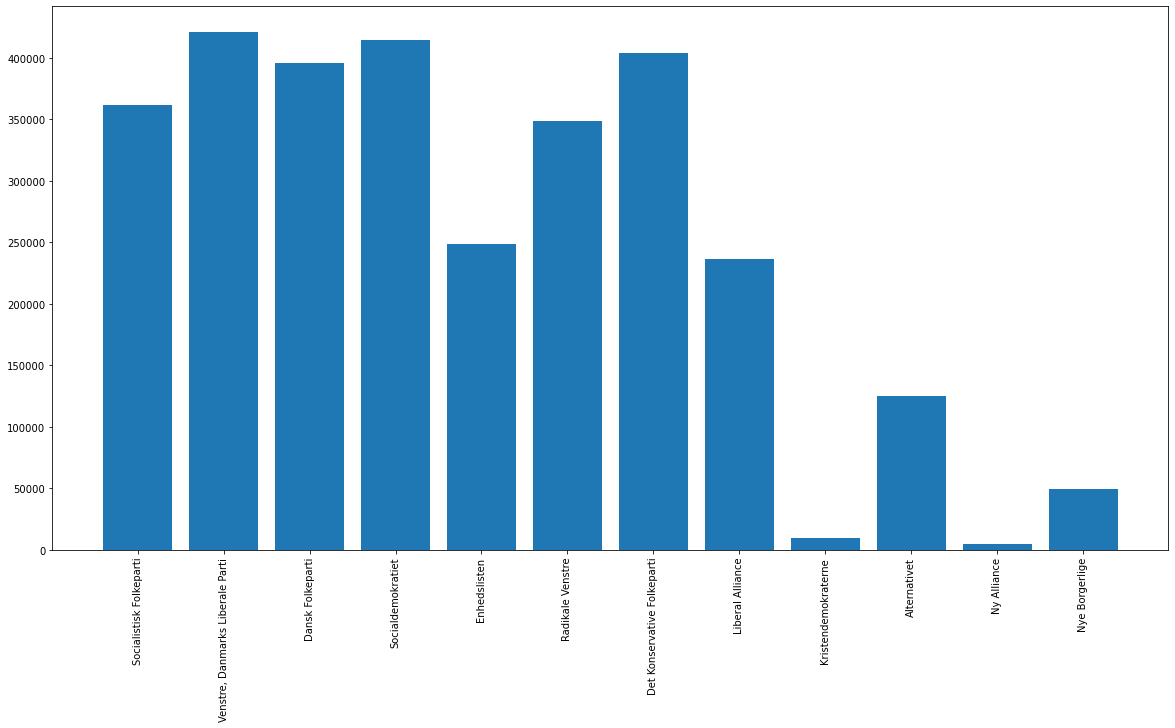

In [71]:
#plot the number of words in each party
plt.figure(figsize=(20, 10))
plt.bar(freqDist.keys(), [len(token_dict[party]) for party in freqDist.keys()])
plt.xticks(rotation=90)
plt.show()

In [72]:
#Including small parties that does not have a representative amount of laws in the dataset will scew the IDF score, so we will remove them from the freqDist dict
#Remove additionally: Ny Alliance, Kristendemokraterne and Nye Borgerlige
few_laws =  ['Ny Alliance', 'Kristendemokraterne', 'Nye Borgerlige']
for party in few_laws:
    if party in freqDist.keys():
        del freqDist[party]

In [76]:
freqDist.keys()
len(freqDist.keys())

9

In [74]:
idf = {}

for party in freqDist.keys():
    #for each community (number)
    for word in freqDist[party].keys():
        #if the word has not been IDF scored yet
        if word not in idf.keys():
            for freq_dict in freqDist.values():
                if word in freq_dict.keys():
                    #if the word is in the frequency dict of a given community, 1 to the IDF score
                    if word not in idf.keys():
                        idf[word] = 1
                    else:
                        idf[word] += 1
            #Divide the total number of communities ("documents ") with the number of communities in which the word appeared
            idf[word] = len(freqDist.keys())/ idf[word]
            idf[word] = np.log2(idf[word])


In [75]:
for party in freqDist.keys():
    for word in freqDist[party].keys():
        freqDist[party][word] = freqDist[party][word]/len(token_dict[party])


tf_idf = {}

for comm in freqDist.keys():
    tf_idf[comm] = {}
    # For each word in the community, multiply the TF and IDF score
    for word in freqDist[comm].keys():
        tf_idf[comm][word] = freqDist[comm][word] * idf[word]

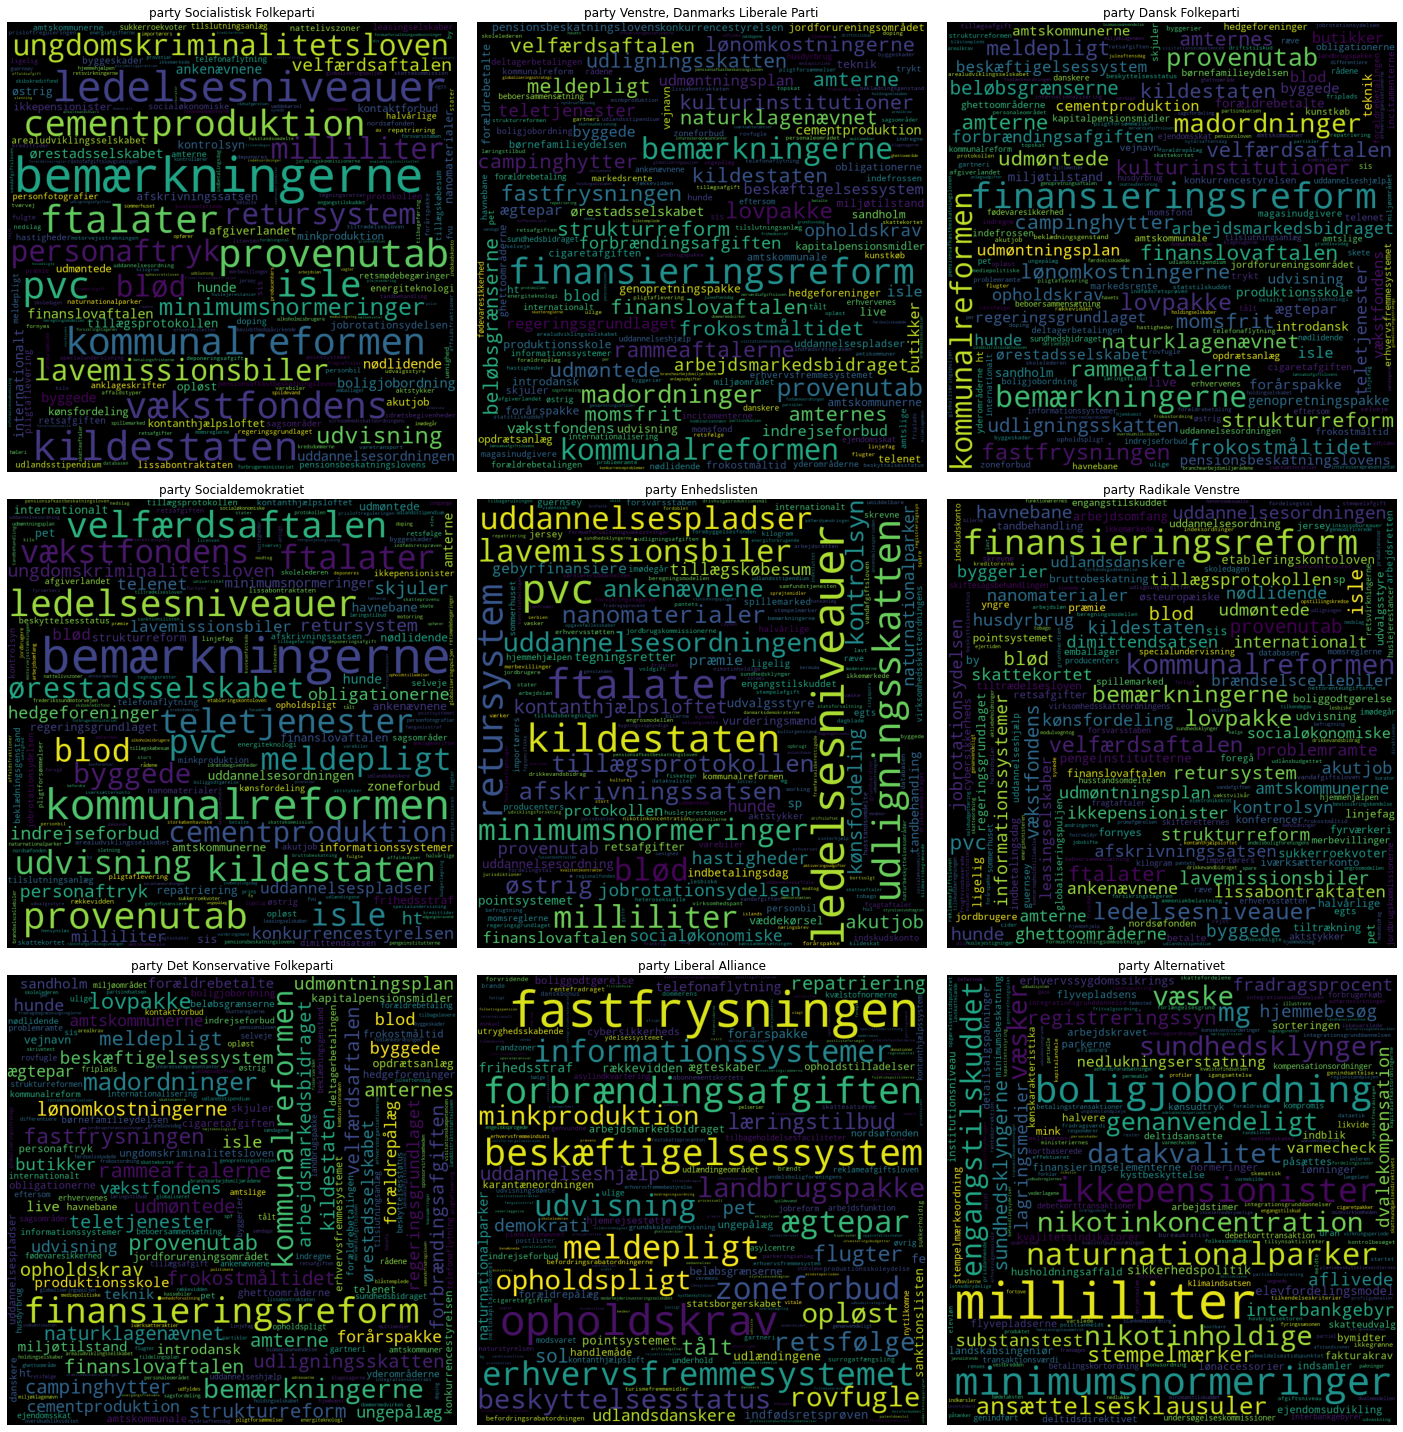

In [77]:
# Create a word cloud for each community

import matplotlib.pyplot as plt
import matplotlib.patches as patches

from matplotlib import colors
from matplotlib.lines import Line2D

from wordcloud import WordCloud, STOPWORDS

fig, axs = plt.subplots(figsize=(20, 20))
plt.subplots_adjust(hspace=0.1, wspace=0.05)
#fig.suptitle("Wordclouds of the parties", fontsize=16)

for n, party in enumerate(tf_idf.keys()):
    wordcloud = WordCloud(
                width = 800, 
                height = 800,
                background_color ='black',
                stopwords = STOPWORDS,
                collocations=False,
                ).generate_from_frequencies(tf_idf[party])
    
    # Create a subplot of the wordcloud
    ax = plt.subplot(3, 3, n+1)
    
    ax.imshow(wordcloud)
    ax.axis("off")
    ax.set_title(f'party {party}')

fig.tight_layout()
plt.show()